In [47]:
import os
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from PIL import Image
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [48]:
warnings.filterwarnings("ignore")

In [49]:
image_folder = "Flickr8k_Dataset/Flickr8k_Dataset"

In [50]:
data = pd.read_csv("./Flickr8k_text/Flickr8k.token.txt", sep="\t")

In [51]:
data = data.drop_duplicates()

In [52]:
data.columns = ["id", "desc"]

In [53]:
data.id = data.id.map(lambda x: x[:len(x) - 2])

In [54]:
nltk.download('stopwords')

KeyboardInterrupt: 

In [55]:
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
english_stop_words = stopwords.words("english")

In [56]:
def english_tokinizer(sentence: str):
    sentence = sentence.strip().lower()
    tokens = word_tokenize(sentence)
    tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in english_stop_words and token.isalnum()
    ]
    return " ".join(tokens)

In [57]:
data.desc = data.desc.map(english_tokinizer)

In [60]:
id_to_description = dict(zip(data['id'], data['desc']))

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['desc'].values.astype('U'))

In [61]:

def recommend_images(input_text, matrix, top_n=5):
    query_vector = tfidf_vectorizer.transform([input_text])
    cosine_similarities = linear_kernel(query_vector, matrix).flatten()
    related_image_indices = cosine_similarities.argsort()[:-60-1:-1]

    image_recommendations = []

    for index in related_image_indices:
        if len(image_recommendations) == top_n:
            return image_recommendations
        image_name = data.iloc[index]['id']
        path = os.path.join("./", image_folder, f"{image_name}")
        if path in image_recommendations:
            continue
        image_recommendations.append(path)

    return image_recommendations


['./Flickr8k_Dataset/Flickr8k_Dataset/3079787482_0757e9d167.jpg', './Flickr8k_Dataset/Flickr8k_Dataset/438639005_208bc59b0b.jpg', './Flickr8k_Dataset/Flickr8k_Dataset/2058472558_7dd5014abd.jpg', './Flickr8k_Dataset/Flickr8k_Dataset/3035118753_69287079dc.jpg', './Flickr8k_Dataset/Flickr8k_Dataset/2172526745_649f420569.jpg']


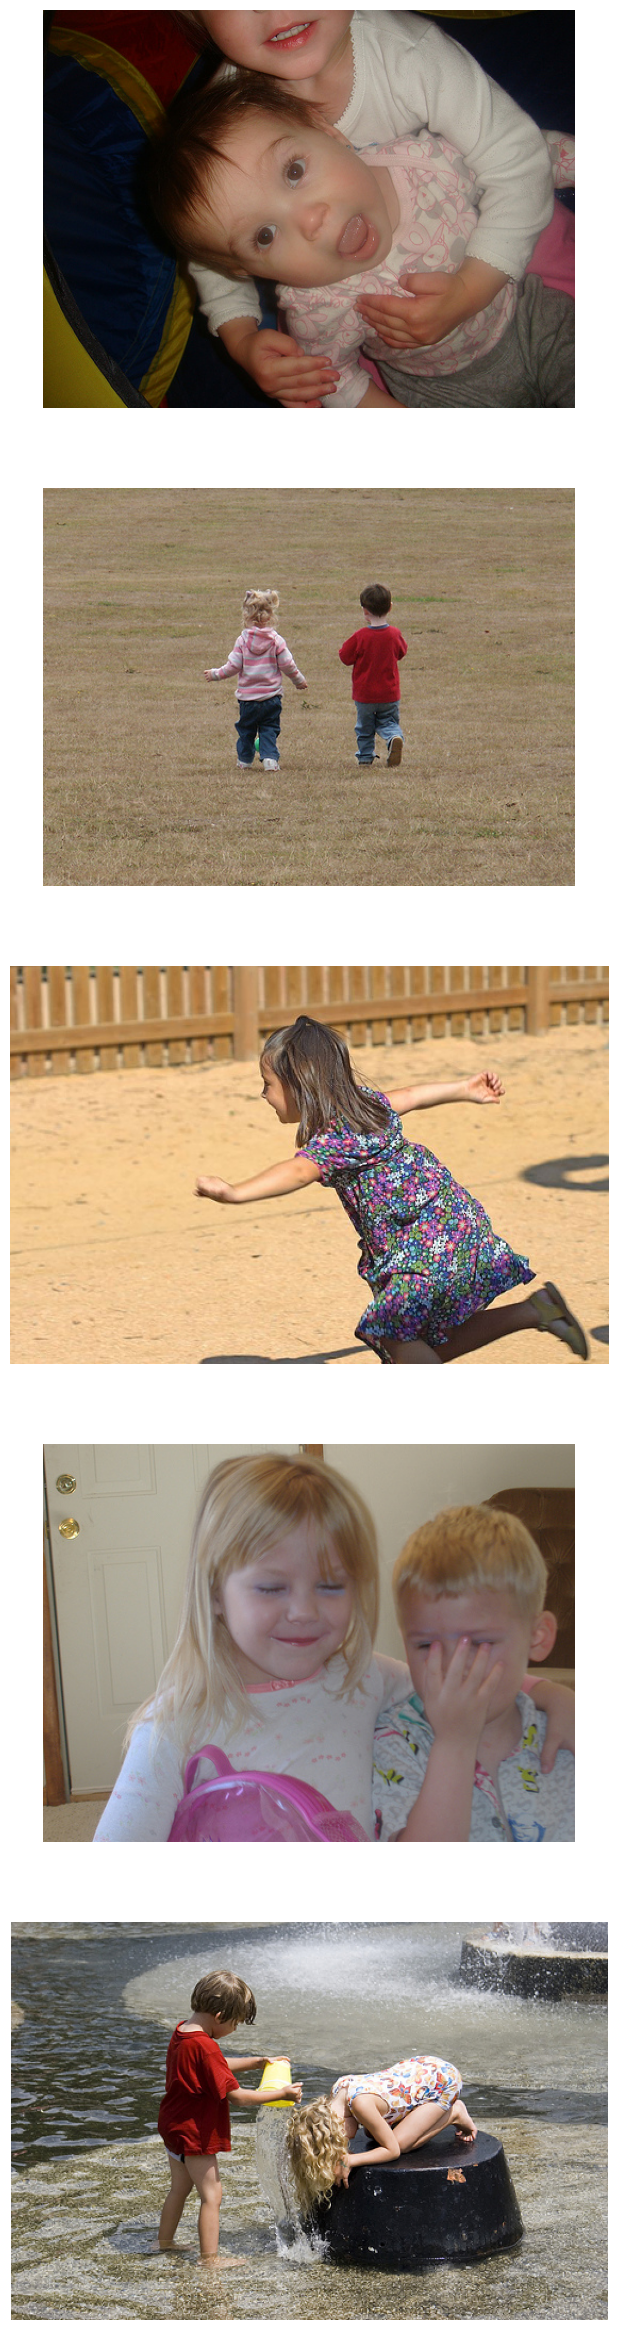

In [63]:
query = "little girl"
recommendations = recommend_images(query, tfidf_matrix)

fig, axs = plt.subplots(len(recommendations), figsize=(30, 30))

for i, image_path in enumerate(recommendations):
    try:
        img = Image.open("./Flickr8k_Dataset/Flicker8k_Dataset/" + image_path.split("/")[-1])
        axs[i].imshow(img)
        axs[i].axis('off')
    except FileNotFoundError:
        print()
plt.show()